In [1]:
%matplotlib inline

from __future__ import print_function

import os
os.environ["THEANO_FLAGS"] = "lib.cnmem=0.4"
import theano

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, minmax_scale, maxabs_scale
from sklearn.metrics import mean_squared_error
from sklearn.cluster import MiniBatchKMeans
import matplotlib
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers.advanced_activations import PReLU
from keras.optimizers import Nadam

import seaborn as sns
sns.set_style("whitegrid") 

import wisp

MAX_POS=13

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 1080 (CNMeM is enabled with initial size: 40.0% of memory, cuDNN 5110)
Using Theano backend.


# 1-dimensional models

## Find which windows and layer sizes are the best

In [ ]:
import importlib
from wisp import model as pepmodel
from wisp import eval as pepeval
wisp = importlib.reload(wisp)
pepeval = importlib.reload(wisp.eval)
pepmodel = importlib.reload(wisp.model)
importlib.reload(wisp.eval)

best_models = [(4,4), (6,6)]
# best_layers = [[128, 64]]

best_hist = {}
best_models_list = {}
best_models_loss = pd.DataFrame()

# N_EPOCHS=10

# for l,r in best_models:
#     for layers in [[32,32], [32,64], [64,64]]:
#         _, best_models_loss = pepmodel.train_model(MAX_POS, 0, "x", layers, l, r, N_EPOCHS, 
#                                                best_hist, best_models_list, best_models_loss, 
#                                                features = "omega", model_type="gru")
        
# for l,r in best_models:
#     for layers in [[128,64]]:
#         _, best_models_loss = pepmodel.train_model(MAX_POS, 0, "x", layers, l, r, N_EPOCHS, 
#                                                    best_hist, best_models_list, best_models_loss, 
#                                                    features = "omega", model_type="dense")
#         _, best_models_loss = pepmodel.train_model(MAX_POS, 0, "x", layers, l, r, N_EPOCHS, 
#                                                    best_hist, best_models_list, best_models_loss, 
#                                                    features = "omega", model_type="dense_pos")

#         _, best_models_loss = pepmodel.train_model(MAX_POS, 5, "x", layers, l, r, N_EPOCHS, 
#                                                    best_hist, best_models_list, best_models_loss, 
#                                                    features = "omega", model_type="dense")
#         _, best_models_loss = pepmodel.train_model(MAX_POS, 5, "x", layers, l, r, N_EPOCHS, 
#                                                    best_hist, best_models_list, best_models_loss, 
#                                                    features = "omega", model_type="dense_pos")
    

N_EPOCHS = 2000
best_models = [(6,6)]
for l,r in best_models:
    _, best_models_loss = pepmodel.train_model(MAX_POS, 0, "x", [2, 64], l, r, N_EPOCHS, 
                                           best_hist, best_models_list, best_models_loss, 
                                           features = "omega", model_type="cnn_pos")
    _, best_models_loss = pepmodel.train_model(MAX_POS, 0, "x", [3, 64], l, r, N_EPOCHS, 
                                           best_hist, best_models_list, best_models_loss, 
                                           features = "omega", model_type="cnn_pos")
    _, best_models_loss = pepmodel.train_model(MAX_POS, 0, "x", [4, 64], l, r, N_EPOCHS, 
                                           best_hist, best_models_list, best_models_loss, 
                                           features = "omega", model_type="cnn_pos")
    
    _, best_models_loss = pepmodel.train_model(MAX_POS, 0, "x", [2, 128], l, r, N_EPOCHS, 
                                           best_hist, best_models_list, best_models_loss, 
                                           features = "omega", model_type="cnn_pos")
    _, best_models_loss = pepmodel.train_model(MAX_POS, 0, "x", [3, 128], l, r, N_EPOCHS, 
                                           best_hist, best_models_list, best_models_loss, 
                                           features = "omega", model_type="cnn_pos")
    _, best_models_loss = pepmodel.train_model(MAX_POS, 0, "x", [4, 128], l, r, N_EPOCHS, 
                                           best_hist, best_models_list, best_models_loss, 
                                           features = "omega", model_type="cnn_pos")
    
    _, best_models_loss = pepmodel.train_model(MAX_POS, 0, "x", [2, 192], l, r, N_EPOCHS, 
                                           best_hist, best_models_list, best_models_loss, 
                                           features = "omega", model_type="cnn_pos")
    _, best_models_loss = pepmodel.train_model(MAX_POS, 0, "x", [3, 192], l, r, N_EPOCHS, 
                                           best_hist, best_models_list, best_models_loss, 
                                           features = "omega", model_type="cnn_pos")
    _, best_models_loss = pepmodel.train_model(MAX_POS, 0, "x", [4, 192], l, r, N_EPOCHS, 
                                           best_hist, best_models_list, best_models_loss, 
                                           features = "omega", model_type="cnn_pos")

print(best_hist.keys())

cnn_pos.l6_r6.2-64.no_no.omega	1.40030911407	( 9.74978 )
cnn_pos.l6_r6.3-64.no_no.omega	1.4744875409	( 9.94455 )
cnn_pos.l6_r6.4-64.no_no.omega	1.48658245456	( 9.58095 )
cnn_pos.l6_r6.2-128.no_no.omega	1.50469330989	( 10.1511 )
cnn_pos.l6_r6.3-128.no_no.omega	1.476804988	( 9.55678 )
cnn_pos.l6_r6.4-128.no_no.omega	1.48554466596	( 9.84494 )
cnn_pos.l6_r6.2-192.no_no.omega	

## Visualize loss

In [151]:
# import importlib
# import wisp.preprocess
# import wisp.model
# import wisp.eval

# importlib.reload(wisp.preprocess)
# importlib.reload(wisp.model)
# importlib.reload(wisp.eval)

# left_win, right_win = 6, 6

# df_cdr = pd.read_csv("data/cdr_coord_x.csv.gz")
# df_can = pd.read_csv("data/can_coord_x.csv.gz")
# X_can, y_can = wisp.preprocess.onehot_omega_delta(df_can, left_win, right_win, MAX_POS, for_rnn=True, add_pos=True)
# X_cdr, y_cdr = wisp.preprocess.onehot_omega_delta(df_cdr, left_win, right_win, MAX_POS, for_rnn=True, add_pos=True)

# input_shape = (left_win+right_win+2, len(wisp.preprocess.CHARS))

(3653, 3)

In [196]:
tmp = pred.reshape((-1, MAX_POS))
tmp2 = y_can[:,0].reshape((-1, MAX_POS))

print((np.abs(tmp2 - tmp).sum(1) ** 2).mean() ** 0.5)
print(((pred.reshape((-1,1)) - y_can[:,0].reshape((-1,1))) ** 2).mean())

25.8475775839
5.94039608937


In [79]:
# importlib.reload(wisp.preprocess)

# for i in range(2,6):
#     print("#clusters", i)
#     clusters = wisp.preprocess.cluster(df_cdr.ix[:, 3:16], i)
#     print(clusters[1])
#     print(sorted(Counter(zip(map(lambda x: x.split("_")[1], df_cdr["key"]), clusters[0])).items(), 
#                  key=lambda x: x[0][0] + str(x[0][1])))

#clusters 2
Counter({1: 42, 0: 27})
[(('TRA', 0), 3), (('TRA', 1), 35), (('TRB', 0), 24), (('TRB', 1), 7)]
#clusters 3
Counter({0: 42, 1: 24, 2: 3})
[(('TRA', 0), 35), (('TRA', 2), 3), (('TRB', 0), 7), (('TRB', 1), 24)]
#clusters 4
Counter({1: 24, 0: 22, 2: 20, 3: 3})
[(('TRA', 0), 15), (('TRA', 2), 20), (('TRA', 3), 3), (('TRB', 0), 7), (('TRB', 1), 24)]
#clusters 5
Counter({0: 24, 1: 21, 3: 16, 4: 5, 2: 3})
[(('TRA', 1), 15), (('TRA', 2), 3), (('TRA', 3), 16), (('TRA', 4), 4), (('TRB', 0), 24), (('TRB', 1), 6), (('TRB', 4), 1)]


In [147]:
# X_cdr = [X_cdr, X_cdr[..., ::-1, ...], np.array([float((x % MAX_POS) + 1) / MAX_POS for x in range(X_cdr.shape[0])])]
# y_cdr = [y_cdr_diff_forw, y_cdr_diff_back, y_cdr]

# X_can = [X_can, X_can[..., ::-1, ...], np.array([float((x % MAX_POS) + 1) / MAX_POS for x in range(X_can.shape[0])])]
# y_can = [y_can_diff_forw, y_can_diff_back, y_can]

In [155]:
# importlib.reload(wisp.eval)
# importlib.reload(wisp.model)

# model_list = {}
# hist_list = {}
# n_epochs = 500
# reduce_lr = wisp.model.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, cooldown=1, min_lr=0.0005)

In [ ]:
# model_name = "gru.64.64"

# model = wisp.model.rnn_model(input_shape, 1, [64,64], "gru", MAX_POS)
# hist_obj = model.fit(X_can, y_can[:,0], batch_size=32, 
#           epochs=n_epochs, verbose=0, callbacks=[reduce_lr],
#           validation_data = (X_cdr, y_cdr[:,0]))
# model_list[model_name] = model
# hist_list[model_name] = hist_obj

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


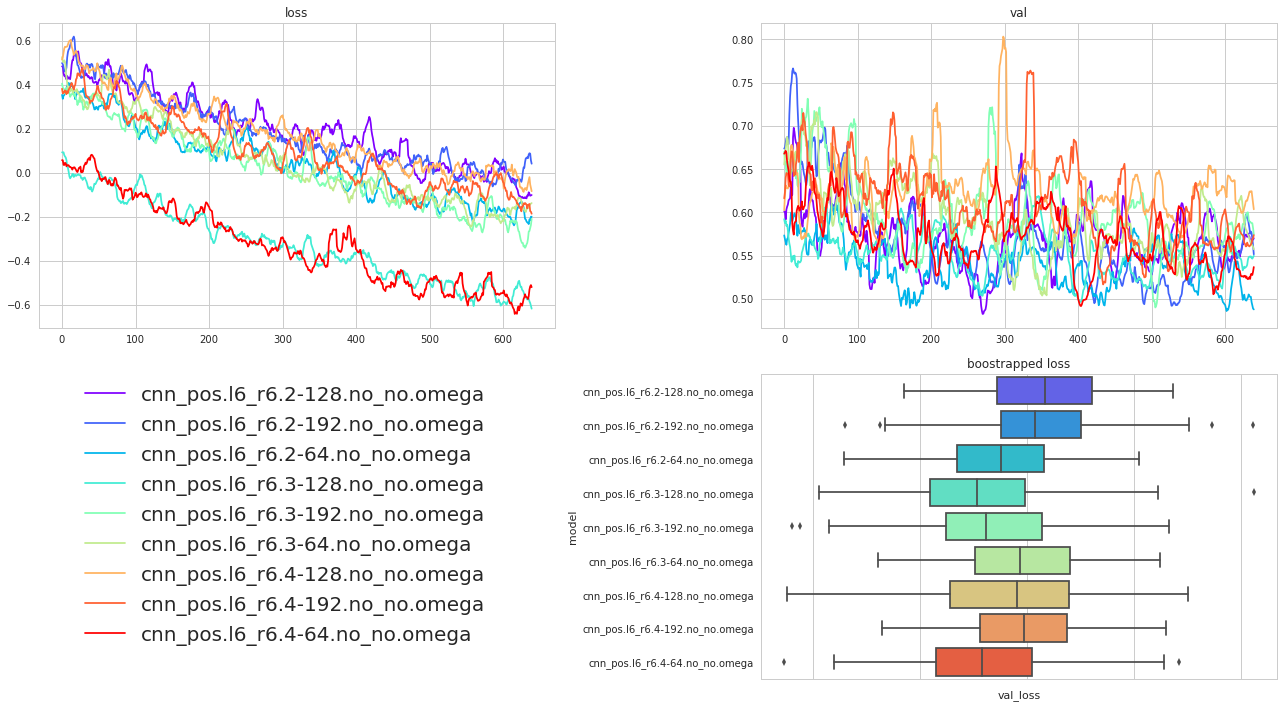

In [75]:
STARTING_FROM = 150

fig = plt.figure()
fig.set_figwidth(18)
fig.set_figheight(10)

gs = plt.GridSpec(2,4) # 2 rows, 3 columns
ax1 = fig.add_subplot(gs[0,:2]) # First row, first column
ax2 = fig.add_subplot(gs[0,2:4]) # First row, second column
ax3 = fig.add_subplot(gs[1,2:4]) # First row, third column

plt.gcf().subplots_adjust(bottom=0.4)

def smooth(vec):
    res = []
    window = 5
    step = 1
    for i in range(window, len(vec)-window, step):
        res.append(np.mean(vec[i-window:i+window+1]))
    return res


cur_hist = best_hist
best_models = sorted([(h, np.mean(cur_hist[h].history["val_loss"][-5:])) for h in cur_hist], key=lambda x: x[1])[:10]

cmap = plt.get_cmap('rainbow')
colors = [cmap(i) for i in np.linspace(0, 1, len(best_models))]

for i, (h, _) in enumerate(sorted(best_models, key=lambda x:x[0])):
    ax1.plot(np.log2(smooth(cur_hist[h].history["loss"][STARTING_FROM:])), label=h, c=colors[i])
    ax2.plot(np.log2(smooth(cur_hist[h].history["val_loss"][STARTING_FROM:])), label=h, c=colors[i])
    
best_models_loss.sort_values("model", inplace=True)
ax3 = sns.boxplot(x = "val_loss", y = "model", data = best_models_loss, palette="rainbow")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)
    
ax1.set_title("loss")
ax2.set_title("val")
ax3.set_title("boostrapped loss")
ax1.legend(prop={'size':4})
ax1.legend(bbox_to_anchor=(.9, -1.1), loc='lower right', ncol = 1)


fig.tight_layout()

# plt.savefig("loss/loss_x_cnnpos_onehot_noclust.png")
plt.savefig("loss/temp.png")
# plt.savefig("loss/loss_x_dense_onehot_noscale_clust5.png")
# plt.savefig("loss/loss_x_dense_onehot_noscale_clust5_fade.png")

## Visualize predictions

In [94]:
print(best_hist.keys())
model = best_models_list["dense_pos.l6_r6.128-64.no_no.omega.clust_5"]
# model = model_list["gru.forw.64.64"]

dict_keys(['dense.l4_r4.128-64.no_no.omega', 'dense_pos.l4_r4.128-64.no_no.omega', 'dense.l4_r4.128-64.no_no.omega.clust_5', 'dense_pos.l4_r4.128-64.no_no.omega.clust_5', 'dense.l6_r6.128-64.no_no.omega', 'dense_pos.l6_r6.128-64.no_no.omega', 'dense.l6_r6.128-64.no_no.omega.clust_5', 'dense_pos.l6_r6.128-64.no_no.omega.clust_5'])


/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


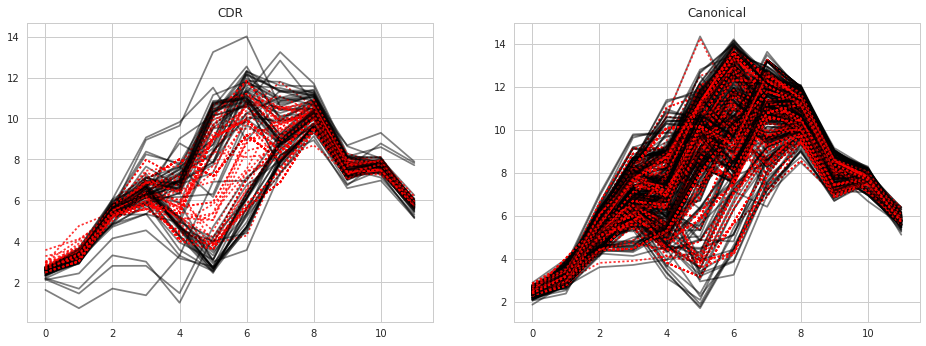

In [107]:
def plot_pred(df, pred, ax, title, colors=["black", "red"]):
    trans = pred.reshape((len(df), MAX_POS))
    for i in range(len(df)):
        ax.plot(range(MAX_POS-1), df.iloc[i,4:16], c=colors[0], alpha=.5, label="real")
        ax.plot(range(MAX_POS-1), trans[i,:-1], c=colors[1], linestyle="dotted", alpha=.8, label="pred")
    ax.set_title(title)


fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(16)
    
# Predicted and real coordinates
df_cdr = pd.read_csv("data/cdr_coord_x.csv.gz")
df_can = pd.read_csv("data/can_coord_x.csv.gz")
X_cdr, y_cdr = wisp.preprocess.onehot_omega(df_cdr, 6, 6, MAX_POS, False)
X_can, y_can = wisp.preprocess.onehot_omega(df_can, 6, 6, MAX_POS, False)

X_cdr =  [X_cdr, 
          np.array([float((x % MAX_POS) + 1) / MAX_POS for x in range(X_cdr.shape[0])])]

X_can =  [X_can, 
          np.array([float((x % MAX_POS) + 1) / MAX_POS for x in range(X_can.shape[0])])]

pred = model.predict(X_cdr)
# pred = wisp.preprocess.diff_to_abs(pred, MAX_POS)
plot_pred(df_cdr, pred, ax[0], "CDR")

pred = model.predict(X_can)
# pred = wisp.preprocess.diff_to_abs(pred, MAX_POS)
plot_pred(df_can, pred, ax[1], "Canonical")

# plt.savefig("pred/pred_x_diff_left_coords.png")

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


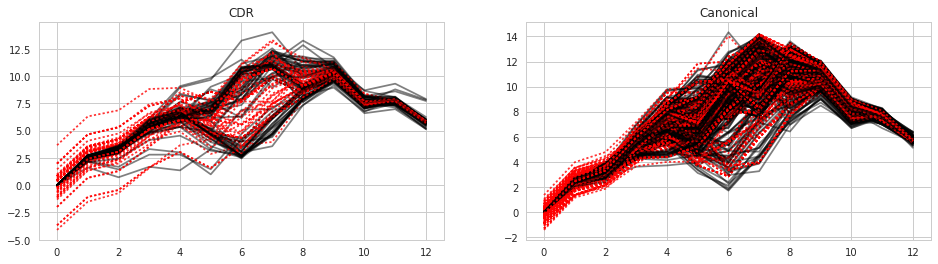

In [251]:
model = model_list["gru.back.64.64"]

fig, ax = plt.subplots(nrows=1, ncols=2)
fig.set_figwidth(16)

pred = model.predict(X_cdr)
pred = wisp.preprocess.diff_to_abs(pred, MAX_POS, rev=True)
plot_pred(df_cdr, pred, ax[0], "CDR")

pred = model.predict(X_can)
pred = wisp.preprocess.diff_to_abs(pred, MAX_POS, rev=True)
plot_pred(df_can, pred, ax[1], "Canonical")

# plt.savefig("pred/pred_x_diff_right_coords.png")

# Ensembling the delta models

In [18]:
model_f = model_list["gru.forw.64.64"]
model_b = model_list["gru.back.64.64"]

def pred_fb(X, model):
    return model.predict(X)

def generate_max_pos(y, max_pos):
    return np.hstack([y, np.array([(x % MAX_POS) / MAX_POS for x in range(y.shape[0])]).reshape((-1,1))])

y_can_true = y_can[:,0]
y_cdr_true = y_cdr[:,0]

y_can_f = wisp.preprocess.diff_to_abs(pred_fb(X_can, model_f), MAX_POS)
y_can_b = wisp.preprocess.diff_to_abs(pred_fb(X_can, model_b), MAX_POS, True)

y_cdr_f = wisp.preprocess.diff_to_abs(pred_fb(X_cdr, model_f), MAX_POS)
y_cdr_b = wisp.preprocess.diff_to_abs(pred_fb(X_cdr, model_b), MAX_POS, True)

y_can_new = generate_max_pos(np.hstack([y_can_f, y_can_b]), MAX_POS)
y_cdr_new = generate_max_pos(np.hstack([y_cdr_f, y_cdr_b]), MAX_POS)

In [24]:
from sklearn.cross_validation import StratifiedKFold

cv = StratifiedKFold([x % MAX_POS for x in range(y_cdr_new.shape[0])], n_folds=10)

In [31]:
from sklearn.linear_model import BayesianRidge
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import mean_squared_error

estimator = BayesianRidge(n_iter=600, normalize=False)
cross_val_score(estimator, y_can_new, y_can_true, scoring="neg_mean_squared_error", cv=cv, n_jobs=10)

array([-0.0673693 , -0.1109571 , -0.39486038, -0.09391625, -0.02850241,
       -0.13117736, -0.10696883, -0.18005811, -0.13272101, -0.20850138])

In [32]:
estimator.fit(y_can_new, y_can_true)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=600,
       normalize=False, tol=0.001, verbose=False)

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


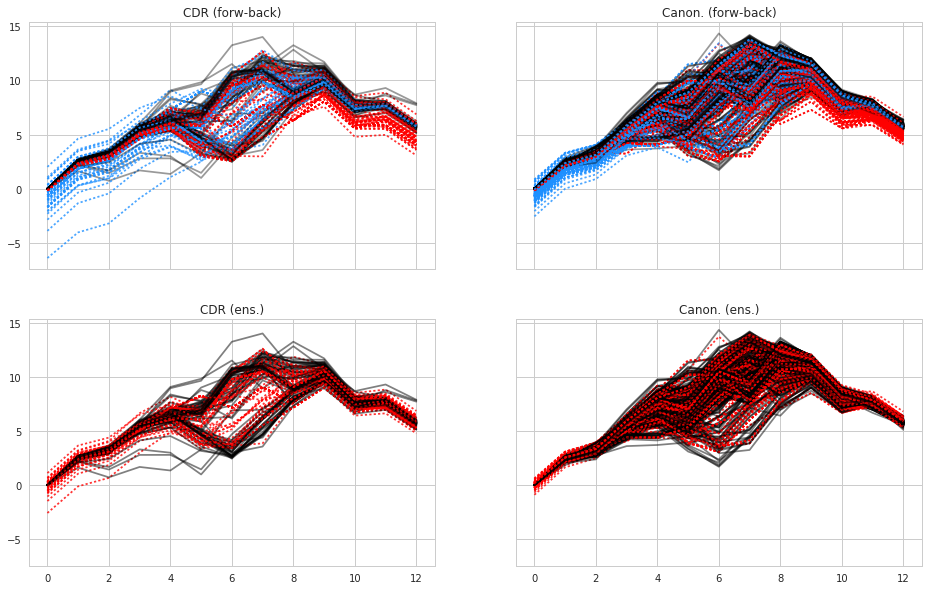

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)
fig.set_figwidth(16)
fig.set_figheight(10)

def plot_pred2(df, pred1, pred2, ax, title):
    trans1 = pred1.reshape((len(df), MAX_POS))
    trans2 = pred2.reshape((len(df), MAX_POS))
    for i in range(len(df)):
        ax.plot(range(MAX_POS), df.iloc[i,3:16], c="black", alpha=.4, label="real")
        ax.plot(range(MAX_POS), trans1[i,:], c="red", linestyle="dotted", alpha=.8, label="forw")
        ax.plot(range(MAX_POS), trans2[i,:], c="dodgerblue", linestyle="dotted", alpha=.8, label="back")
    ax.set_title(title)

plot_pred2(df_cdr, y_cdr_f, y_cdr_b, ax[0][0], "CDR (forw-back)")

plot_pred2(df_can, y_can_f, y_can_b, ax[0][1], "Canon. (forw-back)")

pred = estimator.predict(y_cdr_new)
plot_pred(df_cdr, pred, ax[1][0], "CDR (ens.)")

pred = estimator.predict(y_can_new)
plot_pred(df_can, pred, ax[1][1], "Canon. (ens.)")

# plt.savefig("pred/pred_x_ensembling.png")

# 2-dimensional models

In [ ]:
def to_vec_onehot(df, df_add, left_window, right_window):
    X = np.zeros((len(df)*MAX_POS, (left_window+right_window+1) * len(chars)), dtype=bool)
    y = np.zeros((len(df)*MAX_POS, 2), dtype=np.float32)
    for seq_i, seq in enumerate(df["sequence"]):
        seq = "X"*left_window + seq + "X"*right_window
        for index, target_pos in enumerate(range(left_window + 1, len(seq) - right_window)):
            target_aa = seq[target_pos]
            for amb_pos, amb_aa in enumerate(seq[target_pos-left_window : target_pos+right_window+1]):
                if amb_aa != "X":
                    X[seq_i*MAX_POS + index, amb_pos*len(chars):(amb_pos+1)*len(chars)] = one_hot[amb_aa]
            y[seq_i*MAX_POS + index, 0] = df[[4 + index]].iloc[seq_i]
            y[seq_i*MAX_POS + index, 1] = df_add[[4 + index]].iloc[seq_i]
    return X, y


def train_models(coord, layers, left_window, right_window, n_epochs, hist):
    model_name = "left" + str(left_window) + "_right" + str(right_window)
    if model_name not in hist:
        df_cdr = pd.read_csv("data/cdr_coord_" + coord[0] + ".csv.gz")
        df_can = pd.read_csv("data/can_coord_" + coord[0] + ".csv.gz")
        
        df_cdr_add = pd.read_csv("data/cdr_coord_" + coord[1] + ".csv.gz")
        df_can_add = pd.read_csv("data/can_coord_" + coord[1] + ".csv.gz")

        X_can, y_can = to_vec_onehot(df_can, df_can_add, left_window, right_window)
        X_cdr, y_cdr = to_vec_onehot(df_cdr, df_cdr_add, left_window, right_window)

        model = dense_model((20*(right_window+left_window+1),), 2, layers)

        hist[model_name] = model.fit(X_can, y_can, batch_size=128, epochs=n_epochs, verbose=0, validation_data=(X_cdr, y_cdr))


# hist = {}
# for left_window in range(8):
#     for right_window in range(8):
#         train_models("x", left_window, right_window, 2000, hist)

In [ ]:
best_models = [(3,3), (4,4), (5,5), (6,6)]

best_hist = {}
for l,r in best_models:
    train_models(["x", "y"], [128,64], l, r, 2000, best_hist)

In [ ]:
fig, ax = plt.subplots(nrows=1, sharex=True, ncols=2)
fig.set_figwidth(16)
fig.set_figheight(10)

def smooth(vec):
    res = []
    window = 10
    step = 1
    for i in range(window, len(vec)-window, step):
        res.append(np.mean(vec[i-window:i+window+1]))
    return res

cur_hist = best_hist
best_models = sorted([(h, np.mean(cur_hist[h].history["val_loss"][-5:])) for h in cur_hist], key=lambda x: x[1])[:8]

for i, (h, _) in enumerate(sorted(best_models)):
    ax[0].plot(np.log2(smooth(cur_hist[h].history["loss"][100:])), label=h)
    ax[1].plot(np.log2(smooth(cur_hist[h].history["val_loss"][100:])), label=h)


ax[0].set_title("loss")
ax[1].set_title("val")
ax[0].legend()
ax[1].legend()

plt.savefig("loss/loss_xy_dense2layer_onehot_2000it.png")

In [ ]:
def to_vec_onehot(df, df_add, left_window, right_window):
    X = np.zeros((len(df)*MAX_POS, (left_window+right_window+1) * len(chars)), dtype=bool)
    y = np.zeros((len(df)*MAX_POS, 2), dtype=np.float32)
    for seq_i, seq in enumerate(df["sequence"]):
        seq = "X"*left_window + seq + "X"*right_window
        for index, target_pos in enumerate(range(left_window + 1, len(seq) - right_window)):
            target_aa = seq[target_pos]
            for amb_pos, amb_aa in enumerate(seq[target_pos-left_window : target_pos+right_window+1]):
                if amb_aa != "X":
                    X[seq_i*MAX_POS + index, amb_pos*len(chars):(amb_pos+1)*len(chars)] = one_hot[amb_aa]
            y[seq_i*MAX_POS + index, 0] = df[[4 + index]].iloc[seq_i]
            y[seq_i*MAX_POS + index, 1] = df_add[[4 + index]].iloc[seq_i]
    return X, y


df_cdr = pd.read_csv("data/cdr_coord_x.csv.gz")
df_can = pd.read_csv("data/can_coord_x.csv.gz")

df_cdr_add = pd.read_csv("data/cdr_coord_y.csv.gz")
df_can_add = pd.read_csv("data/can_coord_y.csv.gz")

X_can, y_can = to_vec_onehot(df_can, df_can_add, 5, 5)
X_cdr, y_cdr = to_vec_onehot(df_cdr, df_cdr_add, 5, 5)

model = dense_model((20*(5+5+1),), 2, [128, 64])

model.fit(X_can, y_can, batch_size=128, epochs=2000, verbose=0, validation_data=(X_cdr, y_cdr))

In [ ]:
# Predicted and real coordinates
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_figwidth(16)
fig.set_figheight(10)


pred = model.predict(X_cdr)
pred_x, pred_y = pred[:,0], pred[:,1]

df_cdr = pd.read_csv("data/cdr_coord_x.csv.gz")
trans = pred_x.reshape((len(df_cdr),12))
for i in range(len(df_cdr)):
    ax[0][0].plot(range(12), df_cdr.iloc[i,4:16], c="black", alpha=.5, label="real")
    ax[0][0].plot(trans[i,:], c = "red", linestyle="dotted", alpha=.7, label="pred")
ax[0][0].set_title("CDR X")

df_cdr = pd.read_csv("data/cdr_coord_y.csv.gz")
trans = pred_y.reshape((len(df_cdr),12))
for i in range(len(df_cdr)):
    ax[1][0].plot(range(12), df_cdr.iloc[i,4:16], c="black", alpha=.5, label="real")
    ax[1][0].plot(trans[i,:], c = "red", linestyle="dotted", alpha=.7, label="pred")
ax[1][0].set_title("CDR Y")

    
pred = model.predict(X_can)
pred_x, pred_y = pred[:,0], pred[:,1]

df_can = pd.read_csv("data/can_coord_x.csv.gz")
trans = pred_x.reshape((len(df_can),12))
for i in range(len(df_can)):
    ax[0][1].plot(range(12), df_can.iloc[i,4:16], c="black", alpha=.5, label="real")
    ax[0][1].plot(trans[i,:], c = "red", linestyle="dotted", alpha=.7, label="pred")
ax[0][1].set_title("Canonical X")

df_can = pd.read_csv("data/can_coord_y.csv.gz")
trans = pred_y.reshape((len(df_can),12))
for i in range(len(df_can)):
    ax[1][1].plot(range(12), df_can.iloc[i,4:16], c="black", alpha=.5, label="real")
    ax[1][1].plot(trans[i,:], c = "red", linestyle="dotted", alpha=.7, label="pred")
ax[1][1].set_title("Canonical Y")

plt.savefig("pred/pred_xy_dense2layer_onehot_2000it.png")

In [ ]:
pred = model.predict(X_cdr)
pred_x, pred_y = pred[:,0], pred[:,1]
pred_x[11]